In [1]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data

16.986678751471327


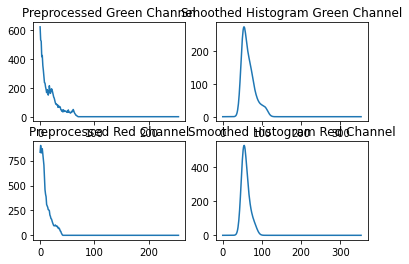

In [9]:
image = cv2.imread('E:/work/totest.jpg',1)
#----------------------------PRE-PROCESSING AND SMOOTHING---------------------------------

Abo,Ago,Aro = cv2.split(image)  #splitting into 3 channels

#glcm = greycomatrix(Aro, [3], [0])
#stats = greycoprops(glcm)
#par1 = stats(1,1)

Ar = Aro - Aro.mean()           #Preprocessing Red
Ar = Ar - Ar.mean() - Aro.std() #Preprocessing Red
Ar = Ar - Ar.mean() - Aro.std() #Preprocessing Red

Mr = Ar.mean()                           #Mean of preprocessed red
SDr = Ar.std()                           #SD of preprocessed red
# Thr = 49.5 - 12 - Ar.std()               #OD Threshold
Thr = Ar.std()
print(Thr)

Ag = Ago - Ago.mean()           #Preprocessing Green
Ag = Ag - Ag.mean() - Ago.std() #Preprocessing Green

Mg = Ag.mean()                           #Mean of preprocessed green
SDg = Ag.std()                           #SD of preprocessed green
Thg = Ag.mean() + 1.1*Ag.std()# + 49.5 + 12 #OC Threshold
#Thg = Ag.mean() + 2*Ag.std() + 49.5 + 12 #OC Threshold

filter = signal.gaussian(99, std=6) #Gaussian Window
filter=filter/sum(filter)

hist,bins = np.histogram(Ag.ravel(),256,[0,256])   #Histogram of preprocessed green channel
histr,binsr = np.histogram(Ar.ravel(),256,[0,256]) #Histogram of preprocessed red channel

smooth_hist_g=np.convolve(filter,hist)  #Histogram Smoothing Green
smooth_hist_r=np.convolve(filter,histr) #Histogram Smoothing Red

plt.subplot(2, 2, 1)
plt.plot(hist)
plt.title("Preprocessed Green Channel")

plt.subplot(2, 2, 2)
plt.plot(smooth_hist_g)
plt.title("Smoothed Histogram Green Channel")

plt.subplot(2, 2, 3)
plt.plot(histr)
plt.title("Preprocessed Red Channel")

plt.subplot(2, 2, 4)
plt.plot(smooth_hist_r)
plt.title("Smoothed Histogram Red Channel")

plt.show()


In [10]:
#---------------------------------APPLYING THRESHOLD--------------------------------------

r,c = Ag.shape
Dd = np.zeros(shape=(r,c))
Dc = np.zeros(shape=(r,c))

for i in range(1,r):
	for j in range(1,c):
		if Ar[i,j]>Thr:
			Dd[i,j]=255
		else:
			Dd[i,j]=0

for i in range(1,r):
	for j in range(1,c):
		if Ag[i,j]>Thg:
			Dc[i,j]=1
		else:
			Dc[i,j]=0


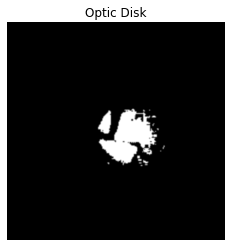

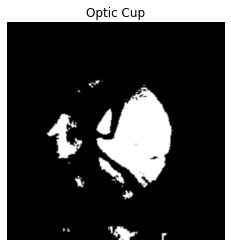

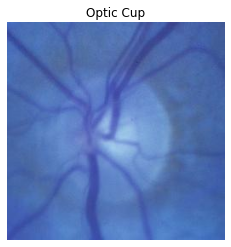

In [11]:
#----------SELECTING LARGEST AREA AND PERFORMING MORPHOLOGY TO FIND EXACT CUP-------------
#L1=cv2.connectedComponents(Dd,


#------------------------DISPLAYING SEGMENTED OPTIC DISK AND CUP--------------------------

plt.imshow(Dd, cmap = 'gray', interpolation = 'bicubic')
plt.axis("off")
plt.title("Optic Disk")
plt.show()

plt.imshow(Dc, cmap = 'gray', interpolation = 'bicubic')
plt.axis("off")
plt.title("Optic Cup")
plt.show()	

plt.imshow(image)
plt.axis("off")
plt.title("Optic Cup")
plt.show()	